In [234]:
import numpy as np
import pandas as pd
from plotutil import plotData

In [235]:
def predict(W, w_0, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    W = W.reshape(X.shape[0], 1)
    
    ### START CODE HERE ### 
    z = np.dot(W.T, X) + w_0
    Y_prediction = sigmoid(z)
    ### END CODE HERE ###
    
    
    
    return Y_prediction

In [236]:
def sigmoid(z):
    c = 1/(1+np.exp(-z))
    return c

In [237]:
def costfunction(X, y, W, lamda):
    hx = sigmoid(np.dot(W.T,X))
    m = X.shape[1]
   # J = np.multiply((-1/m), sum(np.multiply(y,np.log(hx)), np.multiply((1-y),np.log(1 - hx))))
    J = sum(np.multiply(y,np.log(hx)), np.multiply((1-y),np.log(1 - hx)))
    I = np.multiply(np.divide(lamda, 2 * m),sum(W**2))
    K = J + I
    K = K * ( -1 / m)
    return K

In [238]:
def normalize(mtx):
    # Calculate mean for each feature
    # Pay attention to the value of axis = ?
    ### START CODE HERE ###
    mean = np.mean(mtx, axis = 1, keepdims = True)
    std = np.std(mtx, axis = 1, keepdims = True)
    mtx = (mtx-mean) /std
    ### END CODE HERE ###
    
    return mtx

In [239]:
def initialize_with_zeros(dim):
    
    W = np.zeros([dim,1], dtype=int)
    w_0 = 0
    ### END CODE HERE ###

    assert(W.shape == (dim, 1))
    assert(isinstance(w_0, float) or isinstance(w_0, int))
    return W, w_0

In [240]:
# Gradient Descent Algorithm

def gradient_descent(W, w_0, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        # Get the number of training examples
        m = X.shape[1]
        
        
        ### START CODE HERE ### 
        # Calculate the heuristic function: h(x) = W.T * X + w_0
        #Y_hat = np.dot(W.T,X) + w_0
        #hx = mysigmoid(np.dot(W.T,X))
        Y_hat = np.dot(W.T,X) + w_0
        hx = sigmoid(Y_hat)
        
        ### END CODE HERE ###
    
    
        ### START CODE HERE ### 
        # Calculate cost, dw, and dw_0
       
        lamda = 0.9
        cost = costfunction(X, Y, W,lamda)
        
        #dw = np.dot(np.subtract(hx,Y),X[0,i])
        #dw = np.divide(dw, m)
        dw = np.sum((hx - Y) * X, axis = 1, keepdims = True)
        #dw_0 = np.sum(np.subtract(hx,Y).T)
        dw_0 = np.sum(np.subtract(hx,Y))
        
        #W = np.subtract(np.add((W,np.multiply(learning_rate,dw)),np.multiply(np.divide(lamda,m),W))
                        
        W = np.subtract(W,np.multiply(np.divide(learning_rate,m),np.add(dw,np.multiply(np.divide(lamda,m),W))))
                       
        dw_0 = dw_0/ m
        
        ### END CODE HERE ###
        
        
        ### START CODE HERE ### 
        # Update W and w_0
        
        w_0 = np.subtract(w_0, np.multiply(learning_rate, dw_0))
        ### END CODE HERE ###
        
        
        if((i % 100) == 0):
            costs.append(cost)
            
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
        
    params = {
        "W": W,
        "w_0": w_0
    }

    grads = {
        "dw": dw,
        "dw_0": dw_0
    }
        
    return params, grads, costs

In [241]:
# GRADED FUNCTION: predict


In [242]:
# GRADED FUNCTION: model

def model(X_train, Y_train,X_test,Y_test,num_iterations = 1000, learning_rate = 0.02, print_cost = True):
    
    dim = X_train.shape[0]
    W , w_0 =   initialize_with_zeros(dim)
    
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    
    # Gradient descent 
    ### START CODE HERE ###
    parameters, grads, costs = gradient_descent(W, w_0, X_train, Y_train, num_iterations, learning_rate, print_cost)
    ### END CODE HERE ###
        
    # Retrieve parameters w and w_0 from dictionary "parameters"
    W = parameters["W"]
    w_0 = parameters["w_0"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    ### START CODE HERE ###
    Y_prediction_train = predict(W, w_0, X_train)
    Y_prediction_test =  predict(W, w_0, X_test)
    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    print("w is ", W)
    print("b is ", w_0)
    
    d = {"costs": costs,
         #"Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "W" : W, 
         "w_0" : w_0,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

# Plot Training Data #
Before starting the training, you can visualize the data distribution

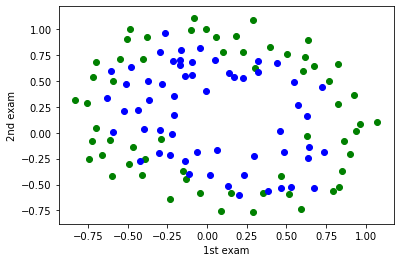

In [243]:
data = np.loadtxt('pa3-data2-polynomial.csv', delimiter=',')
X_train = data[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].T
y_train = data[:,-1].T

plotData(X_train, y_train, "1st exam", "2nd exam")

# Plot the Decision Boundary #
After training, you can plot the decision boundary to see how well your model classify the training data

train accuracy: 73.19346134018919 %
test accuracy: 73.19346134018919 %
w is  [[ 0.4939563 ]
 [ 0.85035665]
 [-0.59381819]
 [-0.52143781]
 [-0.56421472]
 [ 0.29214925]
 [ 0.18205238]
 [-0.02692722]
 [ 0.1591028 ]
 [-0.6300695 ]
 [-0.09961431]
 [-0.29382365]
 [-0.22724269]
 [-0.59567696]
 [-0.01079524]
 [-0.02430526]
 [ 0.25068222]
 [-0.11937348]
 [-0.23907639]
 [-0.16819628]
 [-0.55218883]
 [ 0.023718  ]
 [-0.29915903]
 [ 0.07740379]
 [-0.37667244]
 [-0.14675345]
 [-0.50082021]]
b is  -0.28319334368380206


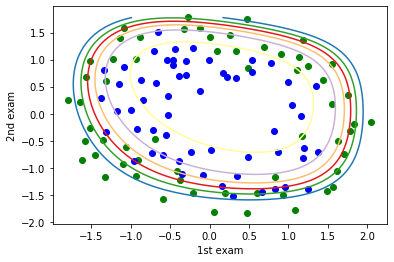

In [244]:
d = model(X_train, y_train,X_train,y_train,num_iterations = 1000, learning_rate = 0.02, print_cost = False)

plotData(normalize(X_train), y_train, xlabel="1st exam", ylabel="2nd exam", w = d["W"], b = d["w_0"], plot_db=True, part_I = False)